In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df_train["label"]
x = df_train.drop(labels = ["label"], axis = 1)

In [5]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

tf.__version__

'1.13.1'

In [8]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

In [10]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [11]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.fit(x_train, y_train, epochs=30)  # train the model

Epoch 1/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2716 - acc: 0.9212
Epoch 2/30
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1109 - acc: 0.9660
Epoch 3/30
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0770 - acc: 0.9759
Epoch 4/30
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0566 - acc: 0.9818
Epoch 5/30
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0429 - acc: 0.9864
Epoch 6/30
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0328 - acc: 0.9887
Epoch 7/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0268 - acc: 0.9914
Epoch 8/30
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0211 - acc: 0.9924
Epoch 9/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0196 - acc: 0.9931
Epoch 10/30
60000/60000 [==============================] - 7s 113us/sampl

In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 0s 48us/sample - loss: 0.1578 - acc: 0.9762
0.15784755943033743
0.9762


In [14]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

[[2.1474251e-25 5.4072594e-26 1.0289535e-21 ... 1.0000000e+00
  3.4046855e-27 2.7329678e-19]
 [3.8492723e-32 1.6096074e-15 1.0000000e+00 ... 2.6779770e-30
  2.3983550e-29 0.0000000e+00]
 [1.9047972e-21 1.0000000e+00 1.3788876e-16 ... 3.4380823e-13
  1.3769568e-11 3.7619471e-21]
 ...
 [3.4196335e-24 1.1397127e-21 6.6205433e-25 ... 1.2692494e-16
  1.2969420e-16 8.2507677e-14]
 [3.4053192e-21 2.0069111e-25 4.6431170e-21 ... 1.6403796e-20
  4.8299614e-19 2.9728823e-28]
 [1.1492754e-26 5.2761910e-22 6.6711333e-21 ... 6.7011822e-35
  3.5243721e-27 8.7869049e-32]]


7


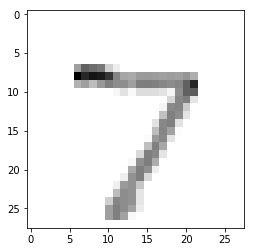

In [15]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()